In [1]:
import numpy as np
import pandas as pd
from gtda.mapper import (
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph
)
from gtda.mapper.cluster import ParallelClustering
from gtda.mapper import Eccentricity,Entropy

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans,MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, OPTICS

In [2]:
import openpyxl
xlsx = pd.ExcelFile('41591_2020_897_MOESM3_ESM.xlsx')
df = pd.read_excel(xlsx, '(B) Figure 1B')

In [3]:
df = df.rename({'Patient ID': 'ID','IgG S/CO': 'IgG (S/CO)', 'IgM S/CO': 'IgM (S/CO)'}, axis=1)

In [4]:
df1 = df[['ID','Days after symptoms onset', 'IgG (S/CO)', 'IgM (S/CO)', 'Severity']]

In [5]:
is_sever = df1['Severity'] == 1
isnt_sever = df1['Severity'] == 0
data_sever = df1[is_sever].drop(['Severity','ID'],axis=1)
data_not_sever = df1[isnt_sever].drop(['Severity','ID'],axis=1)

In [6]:
data_not_sever

,Days after symptoms onset,IgG (S/CO),IgM (S/CO)
0,12,65.484,1.641
3,10,4.151,10.182
5,14,3.081,0.905
6,10,41.416,2.024
7,16,0.819,2.104
...,...,...,...
257,11,3.331,4.997
258,8,2.463,0.266
259,15,4.540,0.711
260,10,0.490,0.669


# Not Severe

## Filter: PCA*

In [7]:
filter_func =PCA(n_components=1)
cover = CubicalCover(n_intervals=46, overlap_frac=0.75) #50,0.75; 100,0.9

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

In [8]:
node_scale = 20
fig = plot_interactive_mapper_graph(pipe, data_not_sever, 
                                    layout_dim=2, 
                                    node_scale=node_scale,
                                    node_color_statistic=None,
                                    color_data = data_not_sever
                                    ),
fig[0]

## Filter: Eccentricity**

In [9]:
filter_func = Eccentricity(exponent = 2)
cover = CubicalCover(n_intervals=60, overlap_frac=0.7)
#70,0.9
#60, 0.7

clusterer = DBSCAN(eps = 0.001,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

In [10]:
node_scale = 30
fig = plot_interactive_mapper_graph(pipe, 
                                    data_not_sever, 
                                    layout_dim=3, 
                                    node_scale=node_scale,
                                    node_color_statistic=np.mean,
                                    color_data = data_not_sever),
fig[0]

# With almost the same parameters as in severe patients

In [11]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = CubicalCover(n_intervals=60, overlap_frac=0.85,kind='balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

In [12]:
fig = plot_interactive_mapper_graph(pipe, 
                                    data_not_sever, 
                                    layout_dim=2, 
                                    node_scale=25,
                                    node_color_statistic=np.mean,
                                    color_data = data_not_sever),
fig[0]

In [13]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = CubicalCover(n_intervals=60, overlap_frac=0.85,kind='balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)
fig = plot_static_mapper_graph(pipe, 
                                    data_not_sever, 
                                    layout_dim=2, 
                                    node_scale=25,
                                    node_color_statistic=np.mean,
                                    color_data = data_not_sever[['IgG (S/CO)']],
                                    plotly_params = {"layout" : {"font_size":14}})
fig.write_image("images/non_sev_ig.pdf")

In [14]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = CubicalCover(n_intervals=60, overlap_frac=0.85,kind='balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)
fig = plot_static_mapper_graph(pipe, 
                                    data_not_sever, 
                                    layout_dim=2, 
                                    node_scale=25,
                                    node_color_statistic=np.mean,
                                    color_data = data_not_sever[['IgM (S/CO)']],
                                    plotly_params = {"layout" : {"font_size":14}})
fig.write_image("images/non_sev_im.pdf")

In [15]:
filter_func = Eccentricity(exponent = 2,metric= 'cosine')
cover = CubicalCover(n_intervals=60, overlap_frac=0.85,kind='balanced')

clusterer = DBSCAN(eps = 0.01,metric='cosine')
#clusterer = AgglomerativeClustering(n_clusters=3,linkage='single')


n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    scaler = MinMaxScaler(),
    filter_func=filter_func,
    cover=cover,
    contract_nodes=True,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)
fig = plot_static_mapper_graph(pipe, 
                                    data_not_sever, 
                                    layout_dim=2, 
                                    node_scale=25,
                                    node_color_statistic=np.mean,
                                    color_data = data_not_sever[['Days after symptoms onset']],
                                    plotly_params = {"layout" : {"font_size":14}})
fig.write_image("images/non_sev_d.pdf")

In [16]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

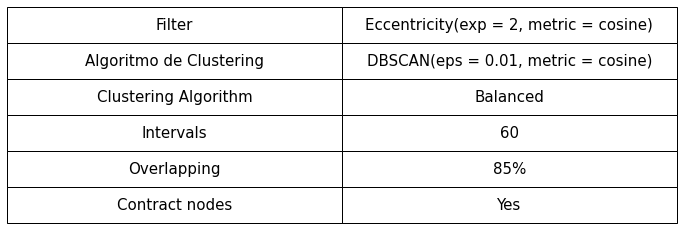

In [17]:
meta_table = plt.table(cellText=[['Filter', 'Eccentricity(exp = 2, metric = cosine)'], 
     ['Algoritmo de Clustering', 'DBSCAN(eps = 0.01, metric = cosine)'],
     ['Clustering Algorithm', 'Balanced'],
     ['Intervals', '60'],
     ['Overlapping', '85%'],
     ['Contract nodes', 'Yes']],
         cellLoc = 'center',
         loc = 'center',
         colLoc = 'center',
         rowLoc = 'center',
         #cellColours = [['#F6EEDB','w'],['#F6EEDB','w'],['#F6EEDB','w'],['#F6EEDB','w'],['#F6EEDB','w'],['#F6EEDB','w']],
         edges = 'closed',
         #colWidths = [0.05,0.20,0.10,0.10,0.10]
         )
plt.axis('off')
meta_table.auto_set_font_size(False)
meta_table.set_fontsize(15)
meta_table.scale(2,3)
meta_fig = meta_table.figure

pp = PdfPages("tabgen4.pdf")
pp.savefig(meta_fig, bbox_inches='tight')
pp.close()